# LEVEL 1 TASKS:

In [1]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('cleaned_data.csv')


In [2]:
df1

,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5915730,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,28.977392,41.022793,Turkish,80,No,No,No,No,3,4.1,Green,Very Good,788
9538,5908749,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,No,3,4.2,Green,Very Good,1034
9539,5915807,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,No,4,3.7,Yellow,Good,661
9540,5916112,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,29.036019,41.057979,Restaurant Cafe,120,No,No,No,No,4,4.0,Green,Very Good,901


## Level 1 - Task1 : Top Cuisines
Determine the top three most common cuisines in the dataset.

Calculate the percentage of restaurants that serve each of the top cuisines

If the Cuisines containing multiple cuisines separated by a comma (For example, "Italian, Chinese"), and if we want to seperate these as different columns as unique cuisine, we will use str.get_dummies method. This method creates separate columns for each unique cuisine and counts the occurrences, even when there are multiple cuisines per entry.

In [3]:
df1["Cuisines"].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [4]:
cuisines_dummies = df1['Cuisines'].str.get_dummies(sep=', ') # creates cuisines_dummies dataframe.
#.str allows sting operations to each element. .get_dummies splits the string using (,) separator.
cuisine_counts = cuisines_dummies.sum().sort_values(ascending=False) #this code sums up values and sorts in descending value
top_three_cuisines = cuisine_counts.head(3)

In [5]:
print("The Top Three most common cuisines in the dataset are:\n",top_three_cuisines)

The Top Three most common cuisines in the dataset are:
 North Indian    3960
Chinese         2733
Fast Food       1986
dtype: int64


In [6]:
total_restaurants = len(df1)
top_cuisines_percentage = (top_three_cuisines / total_restaurants) * 100

In [7]:
print(top_cuisines_percentage)

North Indian    41.500734
Chinese         28.641794
Fast Food       20.813247
dtype: float64


If we want to calculate the top most 3 cuisines directly, then we will use value_counts().nlargest(3). This line directly finds the three most common cuisines without any additional processing.

In [8]:
top_cuisines = df1['Cuisines'].value_counts().nlargest(3)
top_cuisines


Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [9]:
total_restaurants = len(df1)
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100
top_cuisines_percentage


Cuisines
North Indian             9.809264
North Indian, Chinese    5.355271
Chinese                  3.709914
Name: count, dtype: float64

## Task 2 : City Analysis
Identify the city with the highest number of restaurants in the dataset.

Calculate the average rating for restaurants in each city.

Determine the city with the highest average rating. 

In [10]:
city_restaurant_count = df1['City'].value_counts()
city_restaurant_count

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64

In [11]:
city_with_highest_restaurants = city_restaurant_count.idxmax()
city_with_highest_restaurants

'New Delhi'

In [12]:
highest_restaurant_count = city_restaurant_count.max()
highest_restaurant_count

5473

In [13]:
print("The City with Highest number of restaurants is: ",city_with_highest_restaurants,", with ",highest_restaurant_count," restaurants.")

The City with Highest number of restaurants is:  New Delhi , with  5473  restaurants.


In [14]:
average_ratings_by_city = df1.groupby('City')['Aggregate rating'].mean()
print("The average ratings for reastaurants in each city:",average_ratings_by_city)


The average ratings for reastaurants in each city: City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


In [45]:
city_with_highest_rating = average_ratings_by_city.idxmax()
highest_city_rating = average_ratings_by_city.max()

print("City with the highest average rating:" ,city_with_highest_rating, "with an average rating of", highest_city_rating)


City with the highest average rating: Inner City with an average rating of 4.9


## Task 3 : Price Range Distribution
Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

Calculate the percentage of restaurants in each price range category 

In [16]:
 df1['Price range'].value_counts()

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

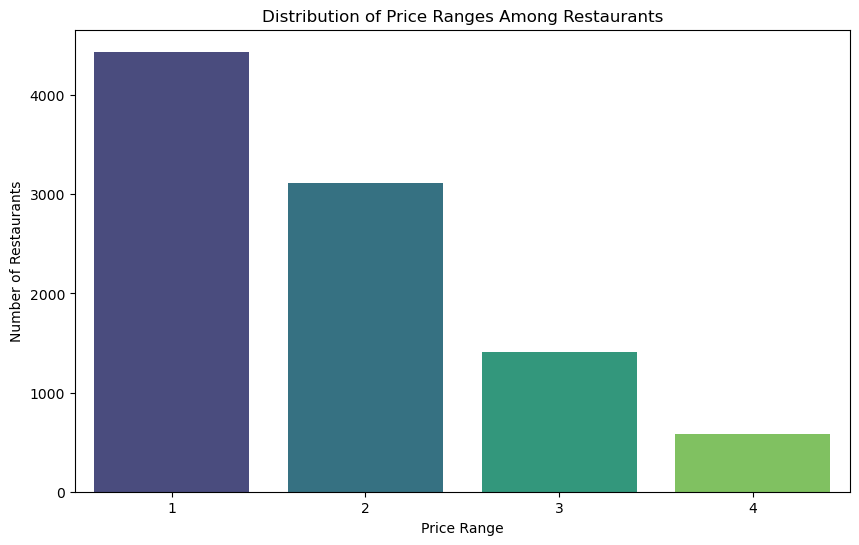

In [17]:
# A bar chart to visualize the distribution of price ranges among the restaurants.

import matplotlib.pyplot as plt
import seaborn as sns
price_counts = df1['Price range'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=price_counts.index, y=price_counts.values, palette="viridis")
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()


Insights: The Number of Restaurants fall under price range 1 is 4438,  2 is 3113,  3 is 1405 and  4 is 586

In [18]:
#The percentage of restaurants in each price range category 
percentage_price_range = (price_counts / len(df1)) * 100
percentage_price_range

Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: count, dtype: float64

## Task 4 : Online Delivery

Determine the percentage of restaurants that offer online delivery.

Compare the average ratings of restaurants with and without online delivery.

In [19]:
# The percentage of restaurants that offer online delivery.

online_delivery_count = df1[df1['Has Online delivery'] == 'Yes'].shape[0] #count of restaurants that has online delivery
total_restaurants = df1.shape[0] #count of total restaurants

# Calculate the percentage of restaurants that offer online delivery.
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100
print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants that offer online delivery: 25.69%


In [20]:
# The average ratings of restaurants with and without online delivery.
rating_comparison = df1.groupby('Has Online delivery')['Aggregate rating'].mean()
print(rating_comparison)


Has Online delivery
No     2.463517
Yes    3.248837
Name: Aggregate rating, dtype: float64


The average ratings of restaurants with and without online delivery are:

With Online delivery - 2.463517

Without Online delivery - 3.248837